In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
filename = "./CW 8- SA_OPT/report_SA_auto.txt"
#filename = r"B:\prg\Z24\msio\MSWIO_24Z\cw8\CW 8- SA_OPT\results\ackley\n10\report_SA_auto_full.txt" #ackley 10 full

funcname = 'Ackley'
n = 10
with open(filename) as f:
    data = f.readlines()

In [315]:
def init_df(n):
    columns = ['t_opt','t','it_opt','it','temp','gamma','boltzcoef','maxiter','seed','y']
    for i in range(n):
        columns += ['x'+str(i)]
    print(columns)
    return pd.DataFrame(columns=columns)
def proc_line(df, line):
    s = line.split('|')
    s.pop()
    s = [float(x) for x in s]
    df.loc[df.shape[0]] = s    
df = init_df(n)
for line in data: proc_line(df,line) 
df.head(2)
default = df.head(6)

['t_opt', 't', 'it_opt', 'it', 'temp', 'gamma', 'boltzcoef', 'maxiter', 'seed', 'y', 'x0']


In [316]:
print(min(df['y']))

2.095604e-05


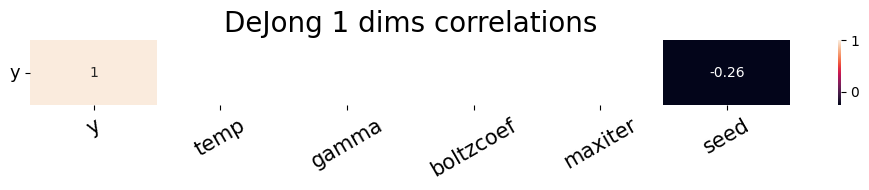

In [317]:
corr = df[['y','temp','gamma','boltzcoef','maxiter','seed']].corr(numeric_only=True)
fig = plt.figure(figsize=(10,2))
hm = sns.heatmap(pd.DataFrame(corr.iloc[0,:]).T, annot=True)
plt.title(funcname + " " + str(n) + " dims correlations", fontsize = 20)

plt.xticks(fontsize=15, rotation = 30)
plt.yticks(fontsize=13, rotation=0)
plt.tight_layout()
fig.savefig("./CW 8- SA_OPT/plots/"+funcname+str(n)+'corr'+'.png')
plt.show(hm)

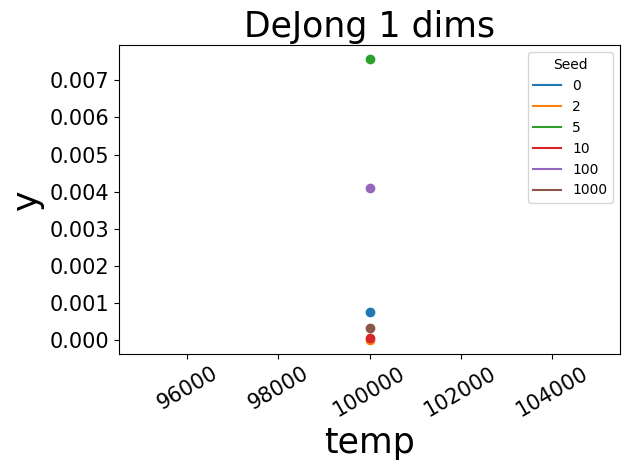

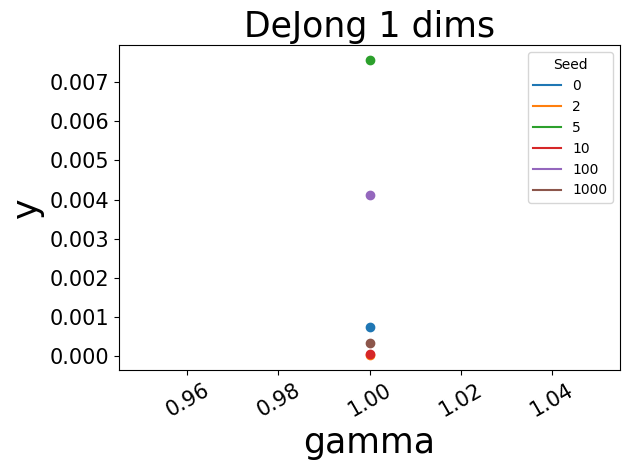

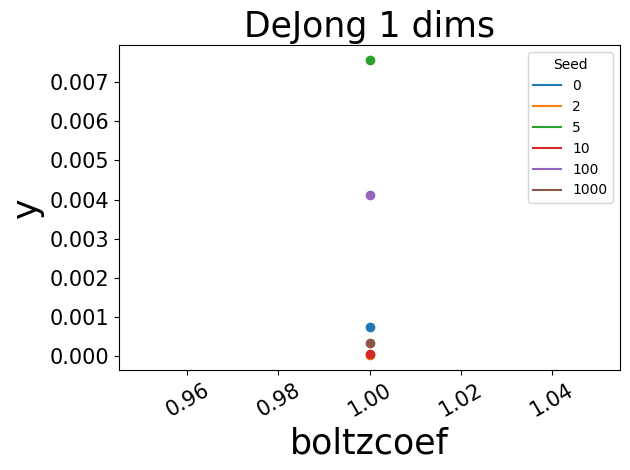

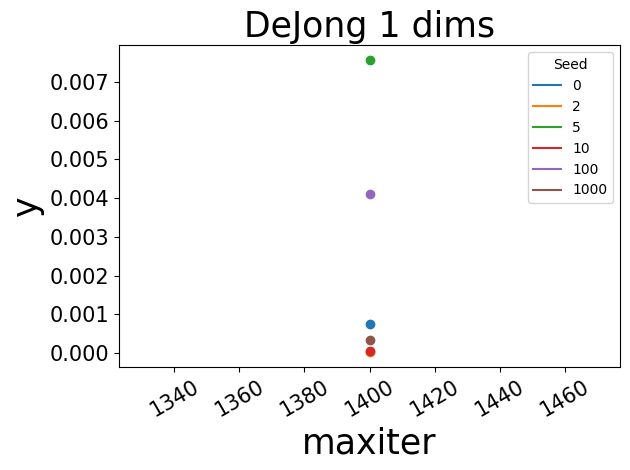

In [318]:
for param in ['temp','gamma','boltzcoef','maxiter']:
    fig = plt.figure()
    #p = 'boltzcoef'
    p = param
    defval = default[p][0]
    tdf = df[df[p]!=defval]
    tdf = pd.concat([tdf,default])
    tdf = tdf.sort_values(by=p)
    for seed in [0,2,5,10,100,1000]:
        itdf = tdf[tdf['seed']==seed]
        plt.plot(itdf[p], itdf['y'],label=seed)
        plt.scatter(itdf[p], itdf['y'])
    plt.legend(title='Seed', loc='upper right')
    plt.title(funcname + " " + str(n) + " dims", fontsize = 25)
    plt.xlabel(p, fontsize=25)
    plt.ylabel('y', fontsize=25)
    plt.xticks(fontsize=15, rotation = 30)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    fig.savefig("./CW 8- SA_OPT/plots/"+funcname+str(n)+param+'.png')
    plt.show()

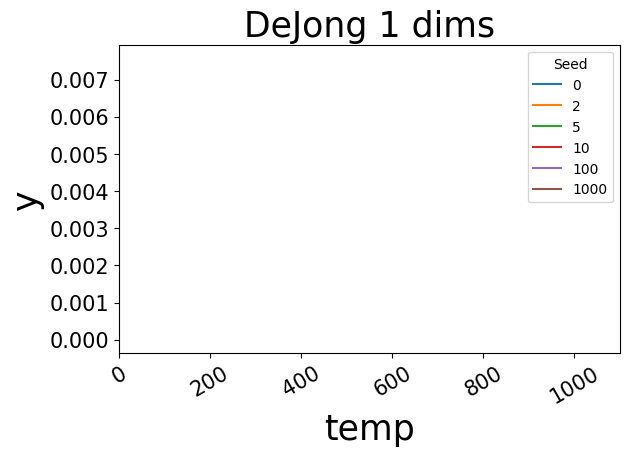

In [319]:

fig = plt.figure()
p = 'temp'
defval = default[p][0]
tdf = df[df[p]!=defval]
tdf = pd.concat([tdf,default])
tdf = tdf.sort_values(by=p)
for seed in [0,2,5,10,100,1000]:
        itdf = tdf[tdf['seed']==seed]
        plt.plot(itdf[p], itdf['y'],label=seed)
        plt.scatter(itdf[p], itdf['y'])
plt.legend(title='Seed')
plt.title(funcname + " " + str(n) + " dims", fontsize = 25)
plt.xlabel(p, fontsize=25)
plt.ylabel('y', fontsize=25)
plt.xticks(fontsize=15, rotation = 30)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.xlim(0, 1100)
fig.savefig("./CW 8- SA_OPT/plots/"+funcname+str(n)+p+'_detailed.png')
plt.show()

In [320]:
data

['0.019000|0.327000|203|2801|100000.000000|1.000000|1.000000|1400|0|7.544173e-004|2.746666e-002|\n',
 '0.062000|0.109000|1517|2801|100000.000000|1.000000|1.000000|1400|2|2.095604e-005|4.577776e-003|\n',
 '0.001000|0.116000|17|2801|100000.000000|1.000000|1.000000|1400|5|7.565129e-003|-8.697775e-002|\n',
 '0.044000|0.107000|1071|2801|100000.000000|1.000000|1.000000|1400|10|5.821121e-005|7.629627e-003|\n',
 '0.028000|0.099000|815|2801|100000.000000|1.000000|1.000000|1400|100|4.107383e-003|-6.408887e-002|\n',
 '0.096000|0.103000|2609|2801|100000.000000|1.000000|1.000000|1400|1000|3.352966e-004|1.831111e-002|\n']

In [321]:
filename = "./CW 8- SA_OPT/log.txt"
#filename = r"B:\prg\Z24\msio\MSWIO_24Z\cw8\CW 8- SA_OPT\results\ackley\n10\report_SA_auto_full.txt" #ackley 10 full
with open(filename) as f:
    data = f.readlines()
def init_df(n):
    columns = ['it','ybest','ycurr']
    return pd.DataFrame(columns=columns)
def proc_line(df, line, i=0):
    s = line.split(',')
    s.pop()
    #s = [float(x) for x in s]
    try:
        x = [s[0],s[1],s[2]]    
        return x
    except Exception as e:
        pass
s = [proc_line(df,line, i) for i, line in enumerate(data)]

In [322]:
df = init_df(n)
df['it'] = [x[0] for x in s if x != None]
df['ybest'] = [x[1] for x in s if x != None]
df['ycurr'] = [x[2] for x in s if x != None]
df.drop(df.tail(1).index,inplace=True)
df = df.astype(float)

In [323]:
df

,it,ybest,ycurr
0,0.0,6373.367000,6373.367000
1,1.0,6373.367000,6373.367000
2,2.0,4178.295000,4178.295000
3,3.0,4178.295000,4178.295000
4,4.0,2318.331000,2318.331000
...,...,...,...
1394,1394.0,0.000335,0.000335
1395,1395.0,0.000335,0.000335
1396,1396.0,0.000335,0.000335
1397,1397.0,0.000335,0.000335


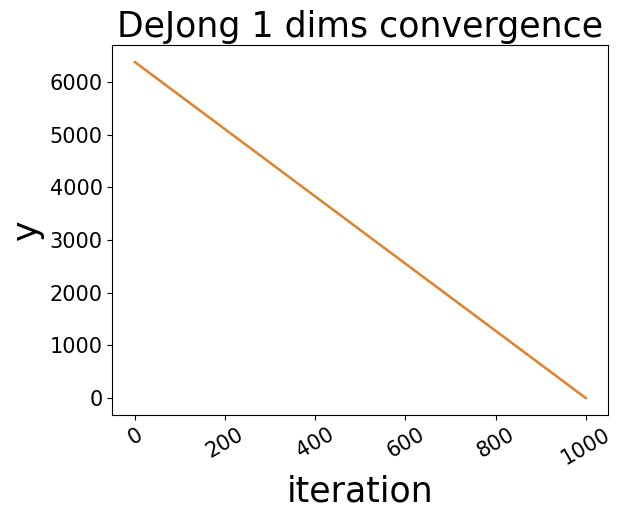

In [324]:
fig = plt.figure()
step = 1000
plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ybest'])
plt.plot(df.iloc[::step]['it'], df.iloc[::step]['ycurr'])
plt.title(funcname + " " + str(n) + " dims convergence", fontsize = 25)
plt.xlabel('iteration', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.xticks(fontsize=15, rotation = 30)
plt.yticks(fontsize=15)
plt.show()